In [2]:
import csv


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv_file = "result-metrics.csv"

In [4]:
df = pd.read_csv(csv_file)
df.head()

,Domain,Total Packets,Total Bytes,Total DNS Packets,Total DNS Bytes,Total Time,Total DNS Time,TTFB,Total DNS Cycles-core,Total DNS Cycles-atom,Total DNS Energy-pkg,Total DNS Energy-psys,Total DNS Energy-cores,Visited Domains
0,iitgn.ac.in,2456,11577920,76,9414,67814.941883,2493.945122,583.443403,794962160,129353853,489.82,1130.04,119.63,"{""'iitgn.ac.in.'"": {'Total Packets': 20, 'Tota..."
1,2mdn.net,0,0,0,0,0.000000,0.000000,-1.000000,-1,0,0.00,0.00,0.00,{}
2,3gppnetwork.org,0,0,0,0,0.000000,0.000000,-1.000000,-1,0,0.00,0.00,0.00,{}
3,3lift.com,0,0,0,0,0.000000,0.000000,-1.000000,-1,0,0.00,0.00,0.00,{}
4,a-msedge.net,0,0,0,0,0.000000,0.000000,-1.000000,-1,0,0.00,0.00,0.00,{}


In [5]:
# clean those rows with Total packets = 0
df = df[df['Total Packets'] != 0]
df.head()

,Domain,Total Packets,Total Bytes,Total DNS Packets,Total DNS Bytes,Total Time,Total DNS Time,TTFB,Total DNS Cycles-core,Total DNS Cycles-atom,Total DNS Energy-pkg,Total DNS Energy-psys,Total DNS Energy-cores,Visited Domains
0,iitgn.ac.in,2456,11577920,76,9414,67814.941883,2493.945122,583.443403,794962160,129353853,489.82,1130.04,119.63,"{""'iitgn.ac.in.'"": {'Total Packets': 20, 'Tota..."
7,adform.net,7,943,2,524,6.367207,0.291824,-1.000000,-1,0,0.00,0.00,0.00,"{""'adform.net.'"": {'Total Packets': 2, 'Total ..."
9,iitgn.ac.in,2456,11577920,76,9414,67814.941883,2493.945122,583.443403,747160439,133731375,349.83,737.71,125.22,"{""'iitgn.ac.in.'"": {'Total Packets': 20, 'Tota..."
16,adform.net,7,943,2,524,6.367207,0.291824,-1.000000,-1,0,0.00,0.00,0.00,"{""'adform.net.'"": {'Total Packets': 2, 'Total ..."
18,adobe.com,53,13346,10,1864,3379.168749,401.428223,500.652552,79191879,7815510,3.58,6.78,1.77,"{""'adobe.com.'"": {'Total Packets': 6, 'Total R..."


In [6]:
df = df[df["TTFB"] != -1]
df.head()

,Domain,Total Packets,Total Bytes,Total DNS Packets,Total DNS Bytes,Total Time,Total DNS Time,TTFB,Total DNS Cycles-core,Total DNS Cycles-atom,Total DNS Energy-pkg,Total DNS Energy-psys,Total DNS Energy-cores,Visited Domains
0,iitgn.ac.in,2456,11577920,76,9414,67814.941883,2493.945122,583.443403,794962160,129353853,489.82,1130.04,119.63,"{""'iitgn.ac.in.'"": {'Total Packets': 20, 'Tota..."
9,iitgn.ac.in,2456,11577920,76,9414,67814.941883,2493.945122,583.443403,747160439,133731375,349.83,737.71,125.22,"{""'iitgn.ac.in.'"": {'Total Packets': 20, 'Tota..."
18,adobe.com,53,13346,10,1864,3379.168749,401.428223,500.652552,79191879,7815510,3.58,6.78,1.77,"{""'adobe.com.'"": {'Total Packets': 6, 'Total R..."
19,adobe.io,13,1141,2,376,782.224655,0.136614,186.864614,-1,0,0.00,0.00,0.00,"{""'adobe.io.'"": {'Total Packets': 2, 'Total Re..."
21,adsrvr.org,563,1149401,58,10926,15701.669693,755.842924,697.583437,555464426,33415024,30.28,65.74,7.78,"{""'adsrvr.org.'"": {'Total Packets': 18, 'Total..."


In [7]:
import pandas as pd
import ast
import subprocess
import re
from concurrent.futures import ThreadPoolExecutor

In [8]:
domain_rtype_map = {}

for row in df["Visited Domains"]:
    try:
        parsed_row = ast.literal_eval(row)  # Safer than eval
        for domain, data in parsed_row.items():
            qtypes = set(data["qtypes"])  # Use a set for uniqueness
            domain_rtype_map[domain] = {qtype: None for qtype in qtypes}
    except Exception as e:
        print(f"[ERROR] Failed to parse row: {row}, Error: {e}")

print(f"[INFO] Total unique domains: {len(domain_rtype_map)}")

[INFO] Total unique domains: 1656


In [8]:
# data = []
# def get_query_response_sizes(domain, qtype):
#     try:
#         dig_cmd = f"dig {domain} -t {qtype} +noall +stats +qr"
#         res = subprocess.run(dig_cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
#         if res.returncode != 0:
#             raise RuntimeError(f"dig command failed for {domain} {qtype}: {res.stderr.decode('utf-8')}")
        
#         output = res.stdout.decode("utf-8").split("\n")
#         query_size = next(int(re.search(r"\d+", line).group()) for line in output if ";; QUERY SIZE:" in line)
#         response_size = next(int(re.search(r"\d+", line).group()) for line in output if ";; MSG SIZE  rcvd:" in line)
#         return query_size, response_size
#     except Exception as e:
#         print(f"[ERROR] DNS query failed for {domain} {qtype}: {e}")
#         return None, None

# # Step 3: Query DNS in parallel
# def process_domain(domain, qtypes):
#     for qtype in qtypes:
#         query_size, response_size = get_query_response_sizes(domain, qtype)
#         # domain_rtype_map[domain][qtype] = (query_size, response_size)
#         records.append({
#             'domain': domain,
#             'qtype': qtype,
#             'query_size': query_size,
#             'response_size': response_size
#         })
#         # print(f"[DEBUG] {domain} {qtype} -> {domain_rtype_map[domain][qtype]}")

# with ThreadPoolExecutor() as executor:
#     futures = [executor.submit(process_domain, domain, rtypes) for domain, rtypes in domain_rtype_map.items()]
#     for future in futures:
#         future.result()  # Wait for completion

# # Step 4: Convert domain_rtype_map to DataFrame
# # domain_rtype_df = pd.DataFrame.from_dict({
# #     (domain, qtype): sizes
# #     for domain, qtypes in domain_rtype_map.items()
# #     for qtype, sizes in qtypes.items()
# # }, orient='index', columns=["Query Size", "Response Size"]).reset_index()

# # domain_rtype_df.rename(columns={"level_0": "Domain", "level_1": "Record Type"}, inplace=True)

# df = pd.DataFrame(records)
# print(df.head())


In [9]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 1) Fix your metric calculation (example: response/query ratio):
# df['metric'] = (df['response_size'] - df['query_size'])*100/ df['query_size']

# # 2) Melt the DataFrame
# df_melted = df.melt(
#     id_vars=['qtype'],
#     value_vars=['query_size', 'response_size', 'metric'],
#     var_name='metric',
#     value_name='Value'
# )

# # 3) Plot
# plt.figure(figsize=(12, 8))
# sns.barplot(data=df_melted, x='qtype', y='Value', hue='metric')
# plt.title('Query vs Response Sizes (plus ratio)')
# plt.show()

In [33]:
data = {}
# def get_query_response_sizes(domain, qtype):
#     try:
#         dig_cmd = f"dig {domain} -t {qtype} +noedns +noall +stats +qr"
#         res = subprocess.run(dig_cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
#         if res.returncode != 0:
#             raise RuntimeError(f"dig command failed for {domain} {qtype}: {res.stderr.decode('utf-8')}")
        
#         output = res.stdout.decode("utf-8").split("\n")
#         query_size = next(int(re.search(r"\d+", line).group()) for line in output if ";; QUERY SIZE:" in line)
#         response_size = next(int(re.search(r"\d+", line).group()) for line in output if ";; MSG SIZE  rcvd:" in line)
#         return query_size, response_size
#     except Exception as e:
#         print(f"[ERROR] DNS query failed for {domain} {qtype}: {e}")
#         return None, None

# def get_query_response_sizes_any_qtype(domain):
#     try:
#         dig_cmd = f"dig {domain} -t any +noedns +noall +stats +qr"
#         res = subprocess.run(dig_cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
#         if res.returncode != 0:
#             raise RuntimeError(f"dig command failed for {domain}: {res.stderr.decode('utf-8')}")

#         output = res.stdout.decode("utf-8").split("\n")
#         query_size = next(int(re.search(r"\d+", line).group()) for line in output if ";; QUERY SIZE:" in line)
#         response_size = next(int(re.search(r"\d+", line).group()) for line in output if ";; MSG SIZE  rcvd:" in line)
#         return query_size, response_size
#     except Exception as e:
#         print(f"[ERROR] NDN-DNS query failed for {domain}: {e}")
#         return None, None

def get_query_response_sizes(domain, qtype):    
    try:
        dig_cmd = f"dig @8.8.8.8 {domain} -t {qtype} +noedns +noall +stats +qr"
        res = subprocess.run(dig_cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        
        # Check dig return code
        if res.returncode != 0:
            err_msg = res.stderr.decode("utf-8")
            rc = res.returncode
            if rc == 1:
                raise RuntimeError(f"[ERROR] Usage error: {err_msg}")
            elif rc == 8:
                raise RuntimeError(f"[ERROR] Could not open batch file: {err_msg}")
            elif rc == 9:
                raise RuntimeError(f"[ERROR] No reply from server: {err_msg}")
            elif rc == 10:
                raise RuntimeError(f"[ERROR] Internal error: {err_msg}")
            else:
                raise RuntimeError(f"[ERROR] dig command failed for {domain} {qtype} (RC={rc}): {err_msg}")

        output = res.stdout.decode("utf-8").split("\n")
        query_size = next(int(re.search(r"\d+", line).group()) for line in output if ";; QUERY SIZE:" in line)
        response_size = next(int(re.search(r"\d+", line).group()) for line in output if ";; MSG SIZE  rcvd:" in line)
        return query_size, response_size
    except Exception as e:
        print(f"[ERROR] DNS query failed for {domain} {qtype}: {e}")
        return None, None

def get_query_response_sizes_any_qtype(domain):
    try:
        dig_cmd = f"dig @8.8.8.8 {domain} -t any +noedns +noall +stats +qr"
        res = subprocess.run(dig_cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

        # Check dig return code
        if res.returncode != 0:
            err_msg = res.stderr.decode("utf-8")
            rc = res.returncode
            if rc == 1:
                raise RuntimeError(f"[ERROR] Usage error: {err_msg}")
            elif rc == 8:
                raise RuntimeError(f"[ERROR] Could not open batch file: {err_msg}")
            elif rc == 9:
                raise RuntimeError(f"[ERROR] No reply from server: {err_msg}")
            elif rc == 10:
                raise RuntimeError(f"[ERROR] Internal error: {err_msg}")
            else:
                raise RuntimeError(f"[ERROR] dig command failed for {domain} (RC={rc}): {err_msg}")

        output = res.stdout.decode("utf-8").split("\n")
        query_size = next(int(re.search(r"\d+", line).group()) for line in output if ";; QUERY SIZE:" in line)
        response_size = next(int(re.search(r"\d+", line).group()) for line in output if ";; MSG SIZE  rcvd:" in line)
        return query_size, response_size
    except Exception as e:
        print(f"[ERROR] NDN-DNS query failed for {domain}: {e}")
        return None, None

# Step 3: Query DNS in parallel
def process_domain(domain, qtypes):
    for qtype in qtypes:
        if domain not in data:
            data[domain] = {}

        query_size, response_size = get_query_response_sizes(domain, qtype)
        # domain_rtype_map[domain][qtype] = (query_size, response_size)
        data[domain][qtype] = [query_size, response_size]
        # print(f"[DEBUG] {domain} {qtype} -> {domain_rtype_map[domain][qtype]}")
    if domain not in data:
        return
    any_query_size, any_respose_size = get_query_response_sizes_any_qtype(domain)
    data[domain]['NDN-DNS'] = [any_query_size, any_respose_size]


with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_domain, domain, rtypes) for domain, rtypes in domain_rtype_map.items()]
    for future in futures:
        future.result()  # Wait for completion


# for key in data:
#     total_resp = 0
#     q_size = 0
#     count = 0
#     for qtype in data[key]:
#         query_size, response_size = data[key][qtype]
#         if query_size is None or response_size is None:
#             continue
#         # metric = (response_size - query_size) * 100 / query_size
#         # data[key][qtype] = (query_size, response_size, metric)
#         q_size += query_size
#         total_resp += (response_size - query_size)
#         count += 1
#     if count > 0:
#         avg_q_size = q_size / count
#         data[key]['NDN-DNS'] = [avg_q_size - 2, avg_q_size - 2 + total_resp]

for key in data:
    for qtype in data[key]:
        if data[key][qtype][1] is None or data[key][qtype][0] is None:
            data[key][qtype].append(None)
        metric = (data[key][qtype][1] - data[key][qtype][0])*100/ data[key][qtype][1]
        data[key][qtype].append(metric)
        


/tmp/ipykernel_99919/3833239599.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


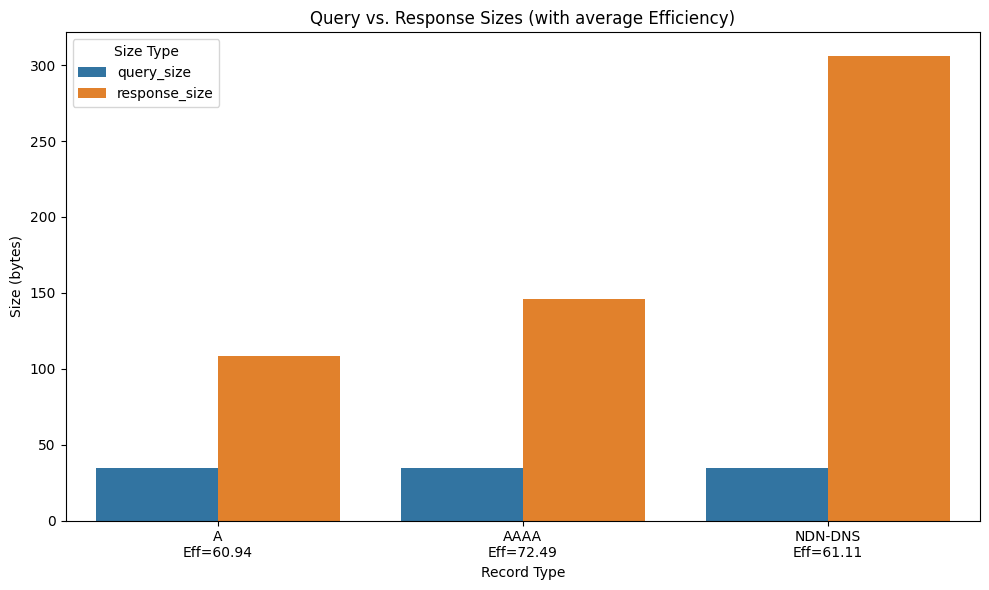

<Figure size 1200x800 with 0 Axes>

In [13]:
records = []
for domain, rtypes in data.items():
    for rtype, values in rtypes.items():
        qsize, rsize, efficiency = values
        records.append({
            'domain': domain,
            'rtype': rtype,
            'query_size': qsize,
            'response_size': rsize,
            'efficiency': efficiency
        })
df = pd.DataFrame(records)

agg_df = df.groupby('rtype', as_index=False).agg({
    'query_size': 'mean',
    'response_size': 'mean',
    'efficiency': 'mean'
})

plot_df = agg_df.melt(
    id_vars=['rtype', 'efficiency'],
    value_vars=['query_size', 'response_size'],
    var_name='SizeType',
    value_name='SizeValue'
)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=plot_df, x='rtype', y='SizeValue', hue='SizeType')

new_labels = []
for rtype in agg_df['rtype']:
    eff = agg_df.loc[agg_df['rtype'] == rtype, 'efficiency'].values[0]
    new_labels.append(f"{rtype}\nEff={eff:.2f}")

ax.set_xticklabels(new_labels)
ax.set_xlabel("Record Type")
ax.set_ylabel("Size (bytes)")
plt.title("Query vs. Response Sizes (with average Efficiency)")
plt.legend(title='Size Type')
plt.tight_layout()
plt.figure(figsize=(12, 8))
plt.show()

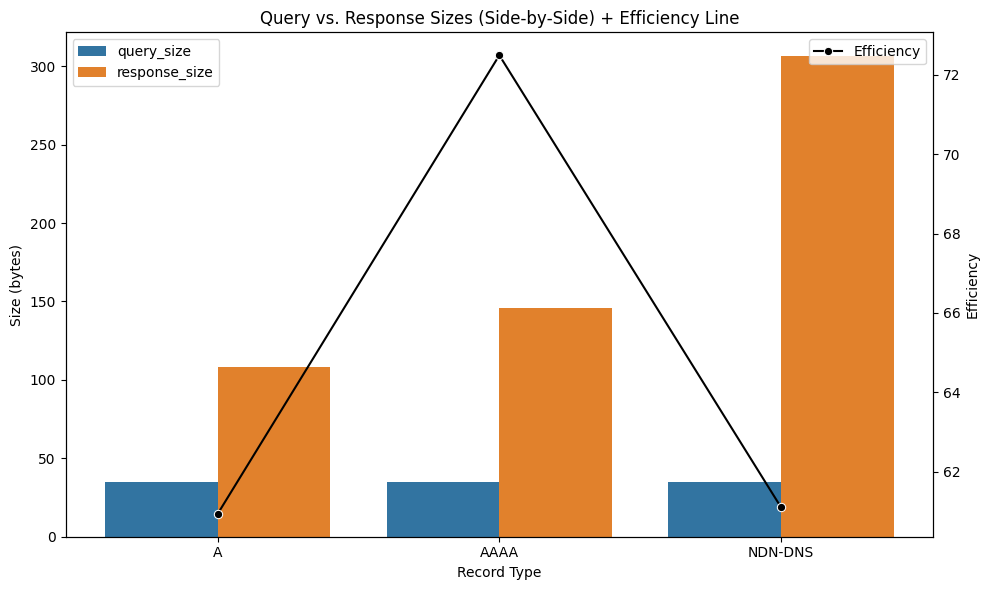

In [32]:
# Create DataFrame
records = []
for domain, rtypes in data.items():
    for rtype, (qsize, rsize, eff) in rtypes.items():
        records.append({
            'domain': domain,
            'rtype': rtype,
            'query_size': qsize,
            'response_size': rsize,
            'efficiency': eff
        })
df = pd.DataFrame(records)

# Aggregate by rtype
agg_df = df.groupby('rtype', as_index=False).agg({
    'query_size': 'mean',
    'response_size': 'mean',
    'efficiency': 'mean'
})

# Melt for side‐by‐side bars
plot_df = agg_df.melt(
    id_vars=['rtype', 'efficiency'],
    value_vars=['query_size', 'response_size'],
    var_name='SizeType',
    value_name='SizeValue'
)

# Main figure and first axes for bars
fig, ax1 = plt.subplots(figsize=(10,6))
sns.barplot(data=plot_df, x='rtype', y='SizeValue', hue='SizeType', ax=ax1)

ax1.set_xlabel("Record Type")
ax1.set_ylabel("Size (bytes)")

# Second axes for efficiency line
ax2 = ax1.twinx()
sns.lineplot(
    data=agg_df,
    x='rtype',
    y='efficiency',
    marker='o',
    color='black',
    ax=ax2,
    label='Efficiency'
)
ax2.set_ylabel("Efficiency")

# Adjust x‐tick labels to include numeric efficiency or leave them simple
# Example without rewriting x‐tick labels:
ax1.set_title("Query vs. Response Sizes (Side‐by‐Side) + Efficiency Line")

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1, labels1+labels2, loc='best')

plt.tight_layout()
plt.show()

/tmp/ipykernel_99919/1024849236.py:54: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


ValueError: No objects to concatenate

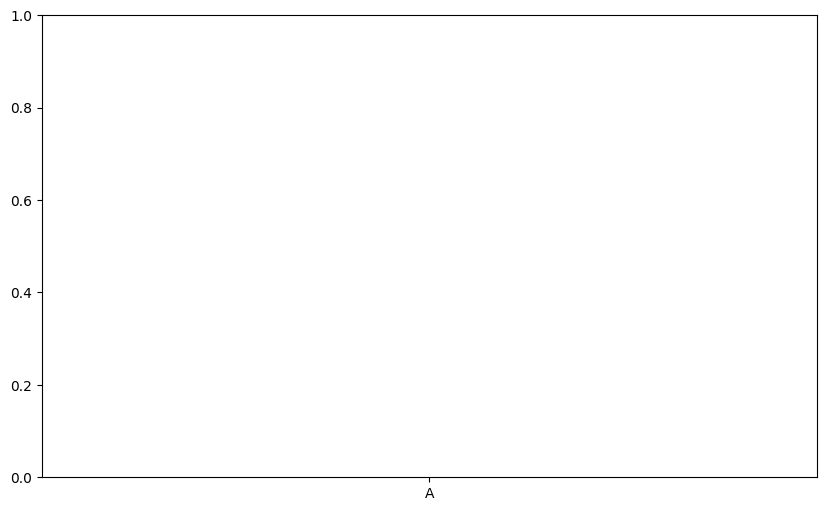

In [22]:
import numpy as np
# 1) Convert to DataFrame
records = []
for domain, rtypes in data.items():
    for rtype, (qsize, rsize, eff) in rtypes.items():
        records.append({
            'domain': domain,
            'rtype': rtype,
            'query_size': qsize,
            'response_size': rsize,
            'efficiency': eff
        })

df = pd.DataFrame(records)

# 1) Group by 'rtype' to compute mean & std
grouped = df.groupby('rtype').agg({
    'query_size': ['mean','std'],
    'response_size': ['mean','std'],
    'efficiency': ['mean','std']
}).reset_index()

grouped.columns = [
    'rtype',
    'query_size_mean','query_size_std',
    'response_size_mean','response_size_std',
    'eff_mean','eff_std'
]

# 2) Melt the mean columns for side-by-side bars
melted_means = grouped.melt(
    id_vars=['rtype','query_size_std','response_size_std','eff_mean','eff_std'],
    value_vars=['query_size_mean','response_size_mean'],
    var_name='SizeType',
    value_name='SizeValue'
)

# Match each row’s SizeType to its corresponding std
std_map = {
    'query_size_mean': 'query_size_std',
    'response_size_mean': 'response_size_std'
}
melted_means['StdValue'] = melted_means.apply(
    lambda row: row[std_map[row['SizeType']]] if row['SizeType'] in std_map else 0,
    axis=1
)

# 3) Sort so each row matches Seaborn’s plotting order
melted_means = melted_means.sort_values(['rtype','SizeType']).reset_index(drop=True)

# 4) Plot side-by-side bars with yerr
fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(
    data=melted_means,
    x='rtype',
    y='SizeValue',
    hue='SizeType',
    ax=ax1,
    ci=None,            # disable built-in confidence intervals
    estimator=None,     # we already computed means
    yerr=melted_means['StdValue'].values
)

ax1.set_xlabel("Record Type")
ax1.set_ylabel("Size (bytes)")

# 5) Plot efficiency on a second axis
ax2 = ax1.twinx()

# Plot the mean efficiency as a line
sns.lineplot(
    data=grouped,
    x='rtype',
    y='eff_mean',
    marker='o',
    color='black',
    ax=ax2,
    label='Efficiency'
)

# Add error bars for efficiency
ax2.errorbar(
    x=np.arange(len(grouped)),
    y=grouped['eff_mean'],
    yerr=grouped['eff_std'],
    fmt='none',
    ecolor='black'
)
ax2.set_ylabel("Efficiency")

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='best')

plt.title("Side‐by‐Side Query/Response Size Bars with Efficiency & Error Bars")
plt.tight_layout()
plt.show()

In [14]:
for domain in data:
    if data[domain]['NDN-DNS'][1] is not None:
         if 'A' in data[domain] and data[domain]['A'][1] is not None:
            if data[domain]['NDN-DNS'][1] < data[domain]['A'][1]:
                print(f"[INFO] {domain} NDN-DNS {data[domain]['NDN-DNS']} is smaller than A {data[domain]['A']}")

[INFO] 'cdn.usefathom.com.' NDN-DNS [35, 69, 49.27536231884058] is smaller than A [35, 85, 58.8235294117647]
[INFO] 'www.facebook.com.' NDN-DNS [34, 63, 46.03174603174603] is smaller than A [34, 79, 56.962025316455694]
[INFO] 'px.ads.linkedin.com.' NDN-DNS [37, 64, 42.1875] is smaller than A [37, 144, 74.30555555555556]
[INFO] 'www.adobe.com.' NDN-DNS [31, 76, 59.21052631578947] is smaller than A [31, 205, 84.8780487804878]
[INFO] 'www.thetradedesk.com.' NDN-DNS [38, 91, 58.24175824175824] is smaller than A [38, 139, 72.66187050359713]
[INFO] 'adsrvr.org.' NDN-DNS [28, 49, 42.857142857142854] is smaller than A [28, 92, 69.56521739130434]
[INFO] 'thetradedesk.com.' NDN-DNS [34, 55, 38.18181818181818] is smaller than A [34, 98, 65.3061224489796]
[INFO] 'amazon.com.' NDN-DNS [28, 49, 42.857142857142854] is smaller than A [28, 76, 63.1578947368421]
[INFO] 'www.amazon.com.' NDN-DNS [32, 68, 52.94117647058823] is smaller than A [32, 127, 74.80314960629921]
[INFO] 'aws.amazon.com.' NDN-DNS [3

In [17]:
## Code to get how many domains support ANY  record type
data2 = {}
for key in domain_rtype_map:
    data2[key] = 0

def check_if_any_supported(domain):
    try:
        dig_cmd = f"dig @8.8.8.8 {domain} -t any +short"
        res = subprocess.run(dig_cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        if res.returncode != 0:
            raise RuntimeError(f"dig command failed for {domain}: {res.stderr.decode('utf-8')}")
        
        output = res.stdout.decode("utf-8").split("\n")
        if len(output) > 0 and output[0].strip():
            return 1
        else:
            return 0
        
    except Exception as e:
        print(f"[ERROR] DNS query failed for {domain}: {e}")
        return None, None

# Step 3: Query DNS in parallel
def process_domain(domain):
    res = check_if_any_supported(domain)
    data2[domain] = res
        # domain_rtype_map[domain][qtype] = (query_size, response_size)

        # print(f"[DEBUG] {domain} {qtype} -> {domain_rtype_map[domain][qtype]}")

with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_domain, domain) for domain in domain_rtype_map.keys()]
    for future in futures:
        future.result()  # Wait for completion

any_supported = []
any_not_supported = []
for domain in data2:
    if data[domain] == 1:
        any_supported.append(domain)
    else:
        any_not_supported.append(domain)

print(f"[INFO] Domains supporting ANY: {len(any_supported)}")
print(f"[INFO] Domains not supporting ANY: {len(any_not_supported)}")

KeyError: "'adobe.io.'"

In [13]:
print(any_not_supported)

["'one.one.'", "'qq.com.'", "'ssl.qhimg.com.'", "'cdn.connatix.com.'", "'ssgs.'", "'ip-api.com.'", "'gdpr-wrapper.privacymanager.io.'", "'www.mapper.ntppool.org.'", "'s.thebrighttag.com.'", "'ddp8vihjq3xn4.cloudfront.net.'", "'s7.addthis.com.'", "'wechat.com.'", "'xnxx.com.'"]


In [14]:
# try once agaiin for failed ones
for domain in any_not_supported:
    res = check_if_any_supported(domain)
    data2[domain] = res

any_supported_2 = []
any_not_supported_2 = []
for domain in data2:
    if data2[domain] == 1:
        any_supported_2.append(domain)
    else:
        any_not_supported_2.append(domain)

print(f"[INFO] Domains supporting ANY: {len(any_supported_2)}")
print(f"[INFO] Domains not supporting ANY: {len(any_not_supported_2)}")

[ERROR] DNS query failed for 'qq.com.': dig command failed for 'qq.com.': 
[ERROR] DNS query failed for 'xnxx.com.': dig command failed for 'xnxx.com.': 
[INFO] Domains supporting ANY: 1646
[INFO] Domains not supporting ANY: 10


In [15]:
print(any_not_supported_2)

["'qq.com.'", "'ssl.qhimg.com.'", "'cdn.connatix.com.'", "'ssgs.'", "'gdpr-wrapper.privacymanager.io.'", "'www.mapper.ntppool.org.'", "'s.thebrighttag.com.'", "'ddp8vihjq3xn4.cloudfront.net.'", "'s7.addthis.com.'", "'xnxx.com.'"]


In [15]:
# data = []

for row in df["Visited Domains"]:
    # print(type(row))
    for key, val in eval(row).items():
        if "CNAME" in val["qtypes"]:
            print(f"[DEBUG] CNAME Query for {key} found\n")

# for row in df["Visited domains"]:
#     for key, val in eval(row).items():
#         data.append({
#             'Domain': key,
#             'Recursive': val['recursive'],
#             'Iterative': val['iterative'],
#             'Delegated': val['delegated']
#         })

# visited_domains_df = pd.DataFrame(data)

# print(visited_domains_df.shape)
# visited_domains_df.head()


In [19]:
count = 0
list_domains = []
for row in df["Visited Domains"]:
    # print(type(row))
    for key, val in eval(row).items():
        if "CNAME" in val["rtypes"]:
            print(f"[DEBUG] CNAME Response for {key} found\n")
            count += 1
            list_domains.append(key)

[DEBUG] CNAME Response for 'cdn.usefathom.com.' found

[DEBUG] CNAME Response for 'www.facebook.com.' found

[DEBUG] CNAME Response for 'px.ads.linkedin.com.' found

[DEBUG] CNAME Response for 'cdn.usefathom.com.' found

[DEBUG] CNAME Response for 'www.facebook.com.' found

[DEBUG] CNAME Response for 'px.ads.linkedin.com.' found

[DEBUG] CNAME Response for 'www.adobe.com.' found

[DEBUG] CNAME Response for 'www.thetradedesk.com.' found

[DEBUG] CNAME Response for 'www.amazon.com.' found

[DEBUG] CNAME Response for 'aws.amazon.com.' found

[DEBUG] CNAME Response for 'd2c.aws.amazon.com.' found

[DEBUG] CNAME Response for 'img.youtube.com.' found

[DEBUG] CNAME Response for 'cdn.ampproject.org.' found

[DEBUG] CNAME Response for 'www.android.com.' found

[DEBUG] CNAME Response for 'lh3.googleusercontent.com.' found

[DEBUG] CNAME Response for 'assets.onestore.ms.' found

[DEBUG] CNAME Response for 'c.s-microsoft.com.' found

[DEBUG] CNAME Response for 'www.microsoft.com.' found

[DEBUG] 

In [18]:
count

1005

In [20]:
df.shape

(611, 14)

In [21]:
import numpy as np

In [28]:
start = np.array([4.799578864, 4.799615683])
end = np.array([4.951573222, 4.965658532])
print((end-start)*1000)

[151.994358 166.042849]


In [23]:
start = np.array([0.035430367, 0.035477696])
end = np.array([0.229095007, 0.248220351])
print((end-start)*1000)

[193.66464  212.742655]


In [29]:
print(212.742655/193.66464 )

1.0985105747750339
